In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def is_terminal(state, grid_size=4):
    terminal_states = ((0, 0), (grid_size - 1, grid_size - 1))
    return state in terminal_states

def step(state, action, grid_size=4):
    """
    Returns next state and reward given a current state and an action.
    """


    if is_terminal(state, grid_size=grid_size):
        return state, 0
    
    x, y = state
    dx, dy = action
    x = np.clip(x + dx, 0, grid_size - 1)
    y = np.clip(y + dy, 0, grid_size - 1)
    state = (x, y)
    
    return state, -1

### Plot functions

In [19]:
def plot_policy(policy, grid_size=4):
    """
    Plots a given policy
    """

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(-0.5, grid_size - 0.5)
    ax.set_ylim(-0.5, grid_size - 0.5)
    ax.set_xticks(np.arange(grid_size))
    ax.set_yticks(np.arange(grid_size))
    ax.set_xticks(np.arange(grid_size) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid_size) - 0.5, minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=3)
    ax.tick_params(which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    
    action_arrows = {(-1, 0): "↑", (1, 0): "↓", (0, -1): "←", (0, 1): "→"}
    for i in range(grid_size):
        for j in range(grid_size):
            if is_terminal((i, j), grid_size=grid_size):
                ax.text(j, grid_size - 1 - i, "T", ha='center', va='center', fontsize=20, fontweight='bold')
            else:
                action = policy[i, j]
                if action:
                    ax.text(j, grid_size - 1 - i, action_arrows[action], ha='center', va='center', fontsize=20)

    plt.title(f"Optimal policy")
    plt.show()


def plot_value_function(V, size=4):
    plt.figure(figsize=(6, 6))
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    for i in range(size):
        for j in range(size):
            plt.text(j, i, f"{V[i, j]:.1f}", ha='center', va='center', color='black')
    plt.title(f"Optimal Value Function")
    plt.show()

# Value Iteration

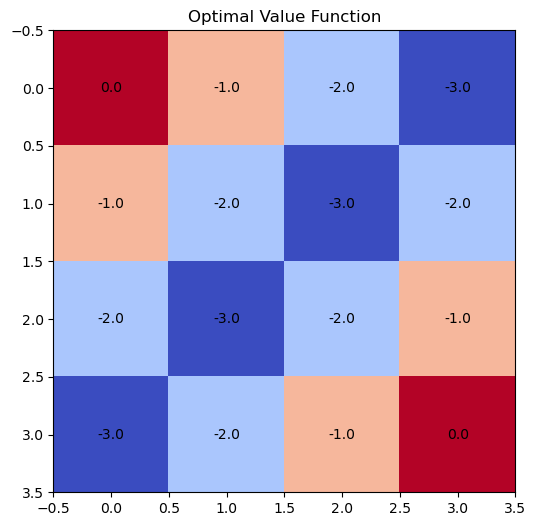

In [20]:
def value_iteration(grid_size=4, gamma=1.0, theta=1e-6):
    V = np.zeros((grid_size, grid_size))
    actions = (
        (-1, 0),  # UP
        (1, 0),   # DOWN
        (0, -1),  # LEFT
        (0, 1)    # RIGHT
    )
    reward = -1
    
    while True:
        delta = 0
        new_V = np.copy(V)
        
        for i in range(grid_size):
            for j in range(grid_size):
                state = (i, j)
                
                if is_terminal(state, grid_size=grid_size):
                    continue
                
                v_values = []
                for di, dj in actions:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        v_values.append(reward + gamma * V[ni, nj])
                    else:
                        v_values.append(reward + gamma * V[i, j])
                
                new_V[i, j] = max(v_values) # Bellman optimality equation as update rule
                delta = max(delta, abs(V[i, j] - new_V[i, j]))
        
        V = new_V
        if delta < theta:
            break
    
    return V


optimal_value_function = value_iteration()
plot_value_function(optimal_value_function)

# Recover one of the optimal policies from the optimal value function

In [21]:
def recover_policy(state_value_function, grid_size=4, gamma=1.0):
    """
    Recovers a deterministic policy given a state value function.
    """

    actions = (
        (-1, 0),  # UP
        (1, 0),   # DOWN
        (0, -1),  # LEFT
        (0, 1)    # RIGHT
    )

    policy = np.full((grid_size, grid_size), None)
    for i in range(grid_size):
        for j in range(grid_size):
            if is_terminal((i, j), grid_size=grid_size):
                continue
            
            best_action = None
            best_value = float('-inf')
            for action in actions:
                next_state, reward = step((i, j), action)
                value = reward + gamma * state_value_function[next_state]
                if value > best_value:
                    best_value = value
                    best_action = action
            
            policy[i, j] = best_action
    
    return policy

In [22]:
optimal_policy = recover_policy(optimal_value_function)

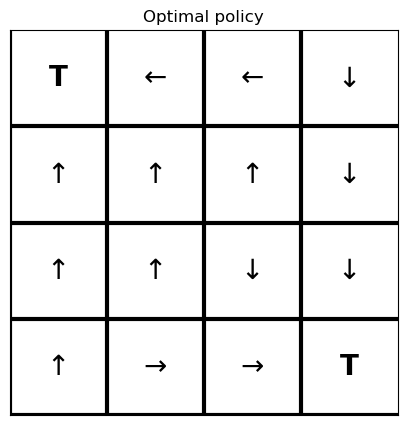

In [23]:
plot_policy(optimal_policy)